# Análise Multivariada e Aprendizado Não-Supervisionado

por Cibele Russo.

ICMC USP São Carlos.

## Aula 8b: Análise Fatorial - Aplicação em Python

**Exemplo: percepções de cereais prontos para comer** 
(Lattin, James; Carroll, J. Douglas; Green, Paul E. Análise de dados multivariados. São Paulo: Cengage Learning, v. 455, 2011, capítulo 5, página 119, exemplo 5.3.1)
    
Como parte de um estudo das impressões do consumidor sobre cereais prontos para comer, patrocinado pela Kellogg da Austrália, Roberts e Lattin (1991) pesquisaram a percepção desses consumidores em relação às suas marcas favoritas de cereais. Solicitou-se a cada respondente que avaliasse suas três marcas preferidas tendo em mente cada um dos 25 atributos. Uma escala de cinco pontos foi utilizada para indicar a extensão de cada atributo em relação a cada marca.

São apresentados os dados de 12 marcas, com respostas de 116 pessoas em 235 observações.

**Cereais:**
1. All Bran
2. Cerola Muesli
3. Just right
4. Kellogg's Corn Flakes
5. Komplete
6. NutriGrain
7. Purina Muesli
8. Rice Bubbles
9. Special K
10. Sustain
11. Vitabrit
12. Weetbrix

**Atributos:**
- Satisfaz
- Natural
- Fibra
- Doce
- Fácil
- Sal
- Gratificante
- Energia
- Divertido
- Crianças
- Encharcado
- Econômico
- Saúde
- Família
- Calorias
- Simples
- Crocante
- Regular
- Açúcar
- Fruta
- Processo
- Qualidade
- Prazer
- Chato
- Nutritivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis




In [2]:
#! pip install factor_analyzer==0.3.2

# Fonte: https://pypi.org/project/factor-analyzer/
# Ver https://www.datacamp.com/community/tutorials/introduction-factor-analysis

from factor_analyzer import FactorAnalyzer


In [3]:
!pip show factor_analyzer

Name: factor-analyzer
Version: 0.3.2
Summary: A Factor Analysis class
Home-page: https://github.com/EducationalTestingService/factor_analyzer
Author: Jeremy Biggs
Author-email: jbiggs@ets.org
License: UNKNOWN
Location: /home/cibele/anaconda3/lib/python3.7/site-packages
Requires: scipy, numpy, pandas, scikit-learn
Required-by: 


In [4]:
df = pd.read_csv("/home/cibele/CibelePython/AMANS/Aula 8/rte_cereal.csv")
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [5]:
df = df.rename(columns={ 'Col1':'Voluntário', 'Col2': 'Cereal'})

In [6]:
df.head()

,Voluntário,Cereal,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [7]:
df['Cereal'] = pd.Categorical(df['Cereal']) 
df['Voluntário'] = pd.Categorical(df['Voluntário']) 

In [8]:
pd.crosstab(index=df['Cereal'], columns='count')      

col_0,count
Cereal,
1,15
3,13
13,16
14,27
15,14
16,24
17,18
19,21
21,23


In [9]:
pd.crosstab(index=df['Voluntário'], columns='count')    

col_0,count
Voluntário,
101,2
103,2
104,3
105,3
106,2
...,...
635,2
636,3
637,2


In [10]:
df = df.rename(columns={
'Col3': 'Satisfaz',
'Col4': 'Natural',
'Col5': 'Fibra',
'Col6': 'Doce',
'Col7': 'Fácil',
'Col8': 'Sal',
'Col9': 'Gratificante',
'Col10': 'Energia',
'Col11': 'Divertido',
'Col12': 'Crianças',
'Col13': 'Encharcado',
'Col14': 'Econômico',
'Col15': 'Saúde',
'Col16': 'Família',
'Col17': 'Calorias',
'Col18': 'Simples',
'Col19': 'Crocante',
'Col20': 'Regular',
'Col21': 'Açúcar',
'Col22': 'Fruta',
'Col23': 'Processo',
'Col24': 'Qualidade',
'Col25': 'Prazer',
'Col26': 'Chato',
'Col27': 'Nutritivo'})

In [11]:
df.head()

,Voluntário,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [12]:
X = df.iloc[:, 2:27]
X

,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,Divertido,Crianças,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,5,5,5,1,2,1,5,4,1,4,...,3,1,4,1,1,3,5,1,1,5
1,1,2,2,1,5,2,5,1,1,5,...,5,5,1,2,1,5,2,1,1,3
2,5,4,5,5,5,3,5,5,5,5,...,1,5,4,3,1,2,5,4,1,5
3,5,5,5,3,5,2,5,5,5,5,...,1,1,4,2,5,2,5,5,1,5
4,4,5,3,2,5,2,5,4,5,5,...,1,5,3,1,1,3,5,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,3,4,4,1,4,2,3,3,2,4,...,4,3,4,1,1,3,4,2,2,4
231,5,4,4,3,4,3,4,4,4,4,...,1,4,4,3,4,2,4,4,1,4
232,4,4,4,1,4,1,4,4,3,4,...,3,3,4,1,1,2,3,3,2,4
233,3,3,3,3,4,2,3,3,2,3,...,3,2,3,2,1,3,3,2,2,3


In [13]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=25, rotation='varimax')
fa.fit(X)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.5044682 , 3.8210452 , 2.50199528, 1.68399409, 1.08535397,
       0.93300686, 0.8516405 , 0.78683657, 0.73171687, 0.69585069,
       0.6468294 , 0.54795846, 0.52915688, 0.48962363, 0.41774279,
       0.38707401, 0.362461  , 0.35882947, 0.30475407, 0.27419206,
       0.26244808, 0.24227943, 0.2179754 , 0.19853087, 0.16423623])

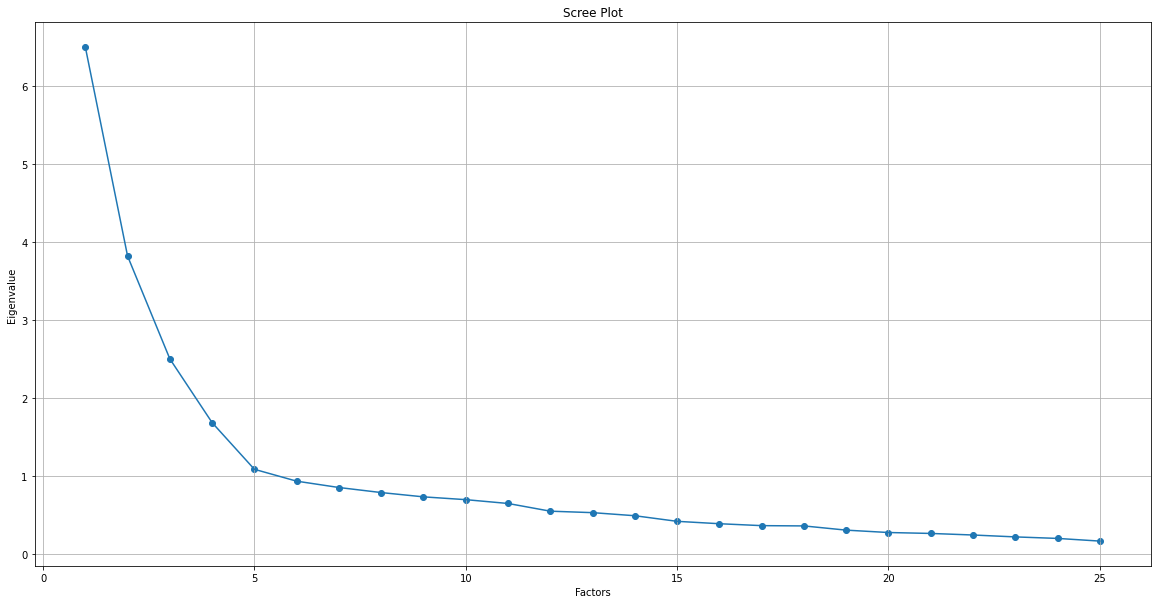

In [14]:
# Create scree plot using matplotlib

plt.figure(figsize=(20,10))
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

plt.grid()
plt.show()

Vamos considerar 4 fatores para a Análise Fatorial!

**Análise Fatorial com fatores não rotacionados**

In [15]:
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(X)

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

**Matriz L de cargas fatoriais estimada**

In [16]:
L = fa.loadings_
np.round(L,2)

array([[ 0.72,  0.1 , -0.07,  0.18],
       [ 0.73, -0.24, -0.11,  0.11],
       [ 0.72, -0.24, -0.31,  0.17],
       [ 0.08,  0.74, -0.21,  0.15],
       [ 0.32,  0.14,  0.2 ,  0.11],
       [-0.21,  0.51, -0.14,  0.41],
       [ 0.72,  0.18,  0.16,  0.17],
       [ 0.7 ,  0.13, -0.07,  0.12],
       [ 0.39,  0.49,  0.21, -0.16],
       [ 0.22,  0.28,  0.76,  0.12],
       [-0.1 , -0.23,  0.15,  0.4 ],
       [ 0.15, -0.23,  0.47,  0.1 ],
       [ 0.81, -0.31, -0.11,  0.08],
       [ 0.31,  0.22,  0.67,  0.03],
       [-0.16,  0.57, -0.17,  0.21],
       [-0.31, -0.36,  0.22,  0.43],
       [ 0.29,  0.45,  0.21, -0.18],
       [ 0.58, -0.13, -0.18,  0.07],
       [-0.25,  0.74, -0.25,  0.25],
       [ 0.37,  0.25, -0.47, -0.15],
       [-0.3 ,  0.27,  0.  ,  0.23],
       [ 0.73, -0.14,  0.05, -0.03],
       [ 0.47,  0.57,  0.07, -0.21],
       [-0.38, -0.26, -0.1 ,  0.34],
       [ 0.8 , -0.22, -0.15,  0.13]])

In [17]:
fa.get_factor_variance()

(array([6.08645101, 3.36420207, 2.05504928, 1.11555393]),
 array([0.24345804, 0.13456808, 0.08220197, 0.04462216]),
 array([0.24345804, 0.37802612, 0.46022809, 0.50485025]))

**Análise Fatorial com fatores rotacionados (varimax, testar outras)**

In [18]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(X)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

**Matriz L de cargas fatoriais estimada**

In [19]:
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = X.columns
L.columns = ['FA1','FA2','FA3','FA4']
L


,FA1,FA2,FA3,FA4
Satisfaz,0.705926,0.088167,0.198222,0.152237
Natural,0.752800,-0.208911,0.054740,0.036777
Fibra,0.821203,-0.116397,-0.120859,0.020583
Doce,0.068946,0.701790,0.071968,0.347628
Fácil,0.238564,0.063576,0.324555,0.065804
Sal,-0.091826,0.685617,0.015718,-0.083106
Gratificante,0.625896,0.076987,0.422415,0.172316
Energia,0.659684,0.078210,0.191243,0.210825
Divertido,0.163479,0.176578,0.415016,0.480073
Crianças,-0.024322,0.035050,0.850781,0.013842


**Maiores cargas nos primeiros dois fatores:**


In [20]:
L.sort_values(by='FA1',ascending=False).head(10)

,FA1,FA2,FA3,FA4
Nutritivo,0.831418,-0.176957,0.050701,0.056027
Saúde,0.828531,-0.288274,0.051120,0.046116
Fibra,0.821203,-0.116397,-0.120859,0.020583
Natural,0.752800,-0.208911,0.054740,0.036777
Satisfaz,0.705926,0.088167,0.198222,0.152237
Energia,0.659684,0.078210,0.191243,0.210825
Qualidade,0.646587,-0.244715,0.203617,0.171207
Gratificante,0.625896,0.076987,0.422415,0.172316
Regular,0.613091,-0.100074,-0.027949,0.088827
Fruta,0.376150,0.186503,-0.269375,0.441862


In [21]:
np.round(fa.get_communalities(),2)

array([0.57, 0.61, 0.7 , 0.62, 0.17, 0.49, 0.61, 0.52, 0.46, 0.73, 0.24,
       0.31, 0.77, 0.59, 0.42, 0.46, 0.36, 0.39, 0.73, 0.44, 0.21, 0.55,
       0.59, 0.34, 0.73])

Sugestão de denominação do primeiro fator: **Saudável**

In [22]:
L.sort_values(by='FA1',ascending=False).head(10)

,FA1,FA2,FA3,FA4
Nutritivo,0.831418,-0.176957,0.050701,0.056027
Saúde,0.828531,-0.288274,0.051120,0.046116
Fibra,0.821203,-0.116397,-0.120859,0.020583
Natural,0.752800,-0.208911,0.054740,0.036777
Satisfaz,0.705926,0.088167,0.198222,0.152237
Energia,0.659684,0.078210,0.191243,0.210825
Qualidade,0.646587,-0.244715,0.203617,0.171207
Gratificante,0.625896,0.076987,0.422415,0.172316
Regular,0.613091,-0.100074,-0.027949,0.088827
Fruta,0.376150,0.186503,-0.269375,0.441862


Sugestões de denominação do segundo fator: **Artificial** ou **Não-saudável**

**Exercício: Analise o terceiro e quarto fator e sugira nomes a eles**

In [36]:
L.sort_values(by='FA3',ascending=False).head(23)

,FA1,FA2,FA3,FA4
Crianças,-0.024322,0.035050,0.850781,0.013842
Família,0.062455,-0.054532,0.760629,0.093225
Gratificante,0.625896,0.076987,0.422415,0.172316
Econômico,0.068874,-0.280265,0.416057,-0.227187
Divertido,0.163479,0.176578,0.415016,0.480073
Crocante,0.073932,0.145985,0.370988,0.437885
Prazer,0.244884,0.233365,0.333632,0.603503
Fácil,0.238564,0.063576,0.324555,0.065804
Qualidade,0.646587,-0.244715,0.203617,0.171207
Satisfaz,0.705926,0.088167,0.198222,0.152237


In [24]:
L.sort_values(by='FA4',ascending=False).head(10)

,FA1,FA2,FA3,FA4
Prazer,0.244884,0.233365,0.333632,0.603503
Divertido,0.163479,0.176578,0.415016,0.480073
Fruta,0.376150,0.186503,-0.269375,0.441862
Crocante,0.073932,0.145985,0.370988,0.437885
Doce,0.068946,0.701790,0.071968,0.347628
Energia,0.659684,0.078210,0.191243,0.210825
Gratificante,0.625896,0.076987,0.422415,0.172316
Qualidade,0.646587,-0.244715,0.203617,0.171207
Açúcar,-0.183849,0.816649,-0.053763,0.165341
Satisfaz,0.705926,0.088167,0.198222,0.152237


**Variância explicada por cada fator**

In [25]:
fa.get_factor_variance()

(array([5.20310472, 2.66037191, 2.46709534, 2.29068431]),
 array([0.20812419, 0.10641488, 0.09868381, 0.09162737]),
 array([0.20812419, 0.31453907, 0.41322288, 0.50485025]))

In [26]:
np.sum(fa.get_factor_variance())

14.566842922737894

In [27]:
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.35718822, 0.18263202, 0.16936376, 0.15725331],
       [0.01428753, 0.00730528, 0.00677455, 0.00629013],
       [0.01428753, 0.02159281, 0.02836736, 0.03465749]])

**Variância percentual explicada por cada fator**

In [28]:
np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance()),2)

array([[0.36, 0.18, 0.17, 0.16],
       [0.01, 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.03, 0.03]])

In [29]:
df[['Fator1','Fator2','Fator3','Fator4']] = np.array(fa.fit_transform(X))[:, 0:4]

In [30]:
df

,Voluntário,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
0,101,25,5,5,5,1,2,1,5,4,...,1,3,5,1,1,5,1.511203,-1.227816,0.205665,-1.623202
1,101,21,1,2,2,1,5,2,5,1,...,1,5,2,1,1,3,-2.071909,-0.588471,1.374526,-1.162636
2,103,21,5,4,5,5,5,3,5,5,...,1,2,5,4,1,5,1.473021,0.812784,1.088764,0.696806
3,103,3,5,5,5,3,5,2,5,5,...,5,2,5,5,1,5,1.647908,-0.057011,0.503627,1.035769
4,104,14,4,5,3,2,5,2,5,4,...,1,3,5,5,1,4,0.414373,-0.798018,1.162082,1.180994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,637,25,3,4,4,1,4,2,3,3,...,1,3,4,2,2,4,-0.049875,-0.852049,0.007291,-1.038142
231,638,17,5,4,4,3,4,3,4,4,...,4,2,4,4,1,4,0.542971,0.801985,-0.184593,1.278528
232,638,25,4,4,4,1,4,1,4,4,...,1,2,3,3,2,4,0.187454,-0.898705,-0.030857,-0.212396
233,639,21,3,3,3,3,4,2,3,3,...,1,3,3,2,2,3,-0.619609,-0.234930,-0.743400,-0.332749


In [31]:
df.sort_values(by='Fator1',ascending=False).head()

,Voluntário,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
40,121,23,5,5,5,5,5,3,5,5,...,4,4,4,5,1,5,1.800709,1.772916,0.594875,0.946000
158,509,24,5,5,5,4,5,4,5,5,...,1,3,3,1,1,5,1.785628,0.970817,-0.017714,-1.697611
31,116,1,5,4,5,1,5,2,5,5,...,1,3,5,2,4,5,1.701156,-0.150973,-1.156637,-0.790033
78,214,24,5,5,5,2,4,1,5,5,...,1,5,5,3,3,5,1.667463,-0.266892,0.957614,-1.141936
3,103,3,5,5,5,3,5,2,5,5,...,5,2,5,5,1,5,1.647908,-0.057011,0.503627,1.035769


In [32]:
df.sort_values(by='Fator2',ascending=False).head()

,Voluntário,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
84,216,16,3,1,2,5,3,4,3,4,...,1,5,1,1,5,1,-2.004780,3.232060,-1.070181,-1.209752
19,110,17,3,4,3,4,5,4,5,3,...,3,5,4,3,1,3,0.106473,2.658713,-1.662884,0.032212
12,107,3,4,4,4,5,5,4,4,4,...,3,3,2,3,2,3,0.014755,2.311869,-0.117537,0.073186
202,623,16,4,2,2,5,4,2,4,3,...,1,5,2,4,2,1,-1.808149,2.130614,0.954689,0.653752
13,107,17,4,4,4,5,5,3,4,4,...,3,3,2,3,2,3,-0.099413,2.065421,0.247917,0.163003


In [33]:
df.sort_values(by='Fator3',ascending=False).head(15)

,Voluntário,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
14,108,14,4,4,3,4,6,4,6,4,...,2,6,5,6,2,4,0.457386,2.033867,2.395862,0.620719
67,208,16,5,3,3,3,5,1,5,5,...,1,3,5,5,1,5,0.224355,-0.971851,1.603950,1.525069
86,217,16,5,4,3,4,5,3,5,5,...,1,4,5,5,1,4,0.142001,1.139136,1.572300,1.188624
6,104,21,4,4,3,2,5,1,5,5,...,1,3,5,5,1,4,0.343484,-0.613576,1.568627,1.362000
16,109,19,3,2,1,3,5,2,4,2,...,1,1,4,4,1,1,-2.247778,-0.429522,1.528648,0.937863
164,601,14,5,3,4,5,5,3,5,4,...,1,2,5,5,1,4,0.474218,1.160796,1.519926,0.706265
32,116,14,5,4,3,2,5,2,5,5,...,1,4,5,5,1,3,0.091426,0.428634,1.518692,1.290257
5,104,19,4,4,4,2,5,2,5,4,...,1,3,5,5,1,4,0.232809,-0.298089,1.429301,1.187791
1,101,21,1,2,2,1,5,2,5,1,...,1,5,2,1,1,3,-2.071909,-0.588471,1.374526,-1.162636
154,507,16,5,4,4,1,5,3,5,5,...,1,4,3,5,1,4,0.442696,0.433320,1.346596,0.288051


In [34]:
df[df['Cereal']==23].describe()

,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,Divertido,Crianças,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
count,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.250000,4.166667,4.166667,2.5,4.750000,1.750000,4.416667,4.333333,3.250000,3.333333,...,3.416667,2.583333,4.000000,3.250000,1.333333,4.166667,0.677950,-0.304194,-0.328501,0.856943
std,0.753778,0.717741,0.577350,1.0,0.621582,0.753778,0.514929,0.492366,1.356801,1.302678,...,0.668558,0.792961,0.603023,1.215431,0.651339,0.389249,0.576499,0.918673,0.876071,0.468176
min,3.000000,3.000000,3.000000,1.0,3.000000,1.000000,4.000000,4.000000,1.000000,1.000000,...,2.000000,1.000000,3.000000,1.000000,1.000000,4.000000,-0.271603,-1.175071,-1.690997,-0.183898
25%,4.000000,4.000000,4.000000,2.0,5.000000,1.000000,4.000000,4.000000,2.000000,2.750000,...,3.000000,2.000000,4.000000,2.750000,1.000000,4.000000,0.379106,-0.987525,-0.838936,0.617901
50%,4.000000,4.000000,4.000000,2.0,5.000000,2.000000,4.000000,4.000000,3.000000,3.000000,...,3.500000,3.000000,4.000000,3.000000,1.000000,4.000000,0.563984,-0.534336,-0.364881,0.868307
75%,5.000000,5.000000,4.250000,3.0,5.000000,2.000000,5.000000,5.000000,4.250000,4.250000,...,4.000000,3.000000,4.000000,4.000000,1.250000,4.000000,0.967569,-0.033562,0.244718,1.201676
max,5.000000,5.000000,5.000000,5.0,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,5.000000,5.000000,3.000000,5.000000,1.800709,1.772916,1.194799,1.513775


In [35]:
df[df['Cereal']==16].describe()

,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,Divertido,Crianças,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.000000,3.166667,3.041667,3.291667,4.50000,2.416667,4.000000,3.833333,3.375000,4.583333,...,1.083333,3.333333,3.250000,3.333333,1.791667,3.333333,-0.425268,0.811222,0.547825,0.288638
std,0.834058,1.049500,1.041703,1.122078,0.65938,0.928611,0.884652,0.916831,1.209114,0.829702,...,0.282330,1.239448,1.224745,1.129319,1.215092,1.129319,1.010920,0.958173,0.770270,0.850119
min,2.000000,1.000000,1.000000,1.000000,3.00000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-2.255889,-0.971851,-1.574086,-1.339032
25%,4.000000,2.750000,2.000000,2.000000,4.00000,2.000000,4.000000,3.750000,3.000000,4.750000,...,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,-0.929506,0.179558,0.419480,-0.251599
50%,4.000000,3.000000,3.000000,3.500000,5.00000,2.000000,4.000000,4.000000,3.000000,5.000000,...,1.000000,4.000000,3.000000,3.500000,1.000000,3.500000,-0.393224,0.971815,0.730821,0.489832
75%,4.250000,4.000000,4.000000,4.000000,5.00000,3.000000,5.000000,4.000000,4.000000,5.000000,...,1.000000,4.000000,4.000000,4.000000,2.250000,4.000000,0.316187,1.350222,0.955864,0.965475
max,5.000000,5.000000,5.000000,5.000000,5.00000,4.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.328698,3.232060,1.603950,1.525069
